TASK - 2


Exploratory Data Analysis (EDA)

Perform an in-depth exploratory data analysis (EDA) on a dataset to identify trends, patterns,
anomalies, and factors influencing performance.


Project 1: General EDA

1. Data Selection

In [5]:
# Loading Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Global_Superstore2.csv', encoding='latin1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#  Initial Inspection
print(df.shape)
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())


(51290, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    512

2. Data Cleaning

In [11]:

# 1. Remove Duplicates
df = df.drop_duplicates()

# 2. Handle Missing Values
# Fill numerical columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include='object'):
   df[col] = df[col].fillna(df[col].mode()[0])

# 3. Outlier Detection and Handling using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ['Sales', 'Profit']:
    df = remove_outliers_iqr(df, col)


In [12]:
#  Statistical Analysis
print("\n Statistical Summary:")
print(df[['Sales', 'Profit']].describe())
print("\n Correlation Matrix:")
print(df[['Sales', 'Profit']].corr())



 Statistical Summary:
              Sales        Profit
count  26732.000000  26732.000000
mean      44.221657      6.747836
std       34.141548     10.179059
min        0.444000    -18.000000
25%       17.088000      0.960000
50%       34.650000      5.460000
75%       61.623000     12.780000
max      147.582000     32.400000

 Correlation Matrix:
           Sales    Profit
Sales   1.000000  0.456768
Profit  0.456768  1.000000


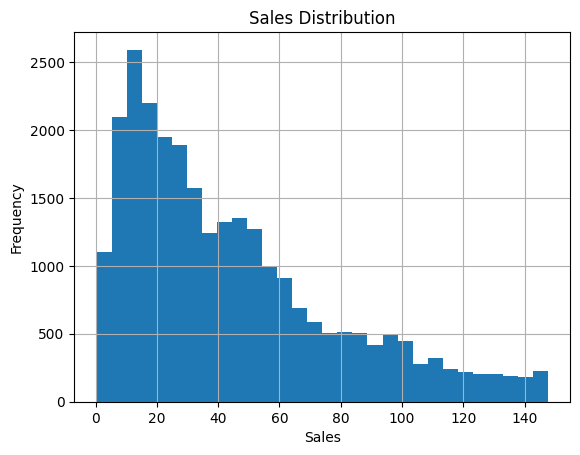

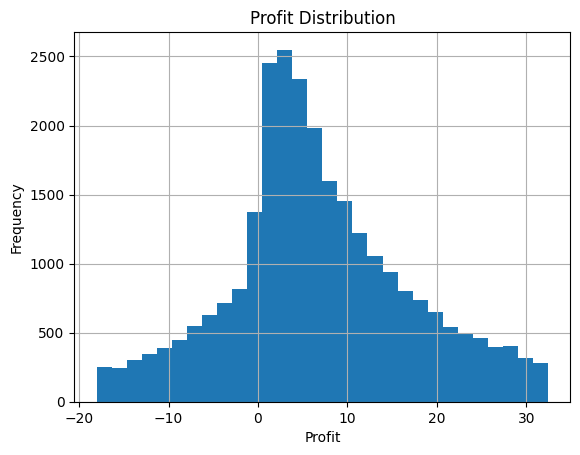

In [13]:
# Data Visualization

# Histogram
df['Sales'].hist(bins=30)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

df['Profit'].hist(bins=30)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

##Insight:

Histogram 1:

Sales distribution is right-skewed.

Most sales values are concentrated at lower ranges.

A few extremely high sales outliers exist.

Histogram 2:

Profit also shows a right-skewed distribution.

While many transactions yield small profits, there are some with extremely high profit.

Negative profits indicate loss-making sales are present.

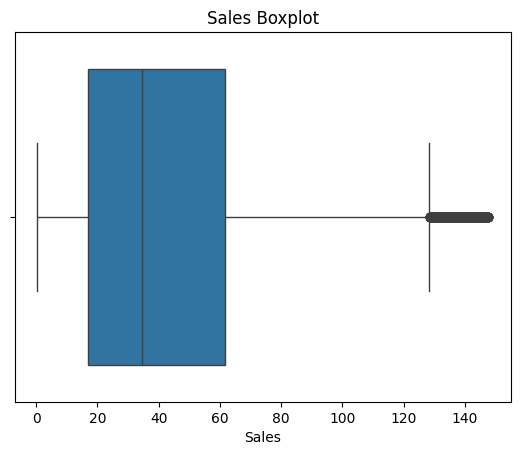

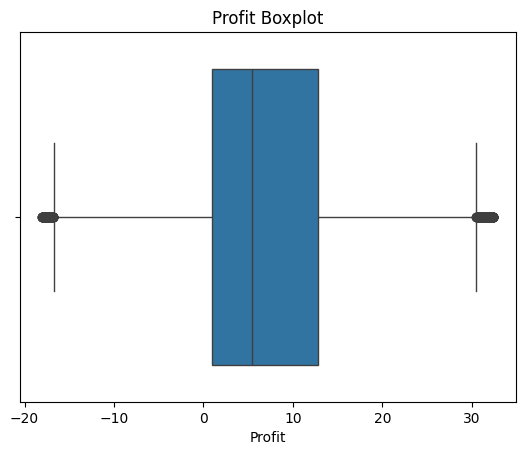

In [14]:
# Boxplot
sns.boxplot(x=df['Sales'])
plt.title('Sales Boxplot')
plt.show()

sns.boxplot(x=df['Profit'])
plt.title('Profit Boxplot')
plt.show()


##Insight:

There are numerous outliers in both Sales and Profit.

Confirms that the data includes some high-value, rare transactions.

Boxplot highlights the need for outlier handling before modeling.

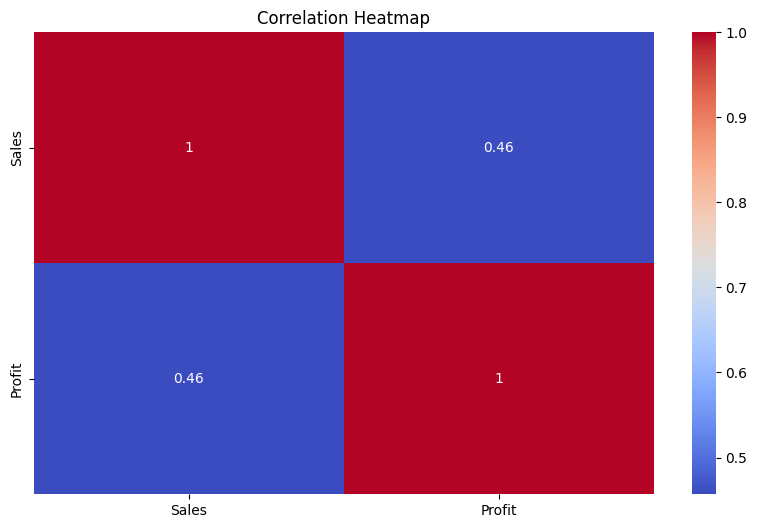

In [15]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Sales', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##Insight:

Strong positive correlation between Sales and Profit.

Indicates that, generally, as sales increase, profits tend to increase — although not perfectly (due to discounts, costs, etc.).


 Project 2: Sales Performance Analysis


In [17]:
#  Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Global_Superstore2.csv', encoding='latin1')
print(df.shape)
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(51290, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non

Data Analysis

/tmp/ipython-input-18-280851837.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


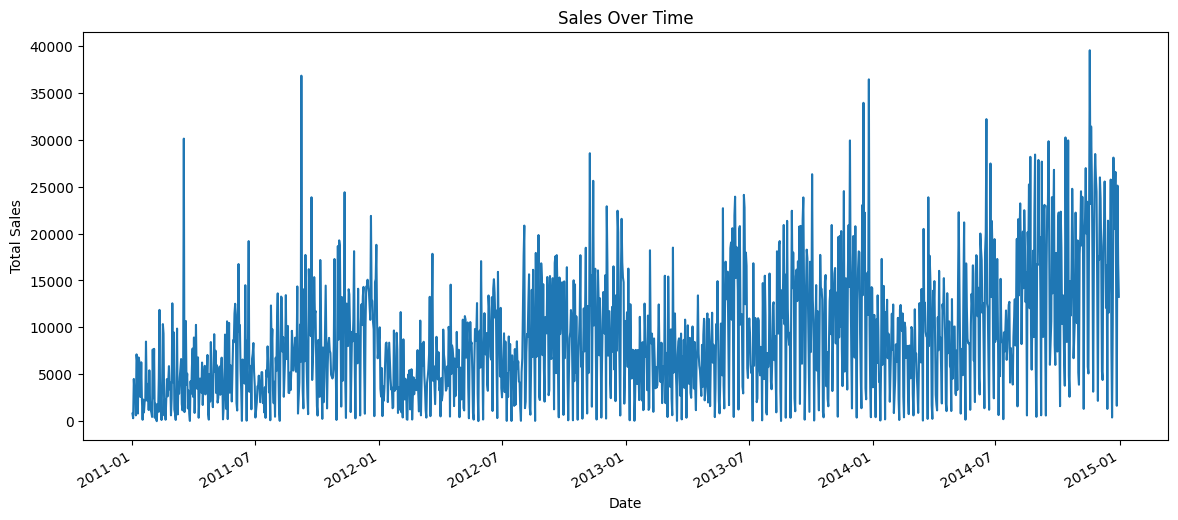

In [18]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])

# Time Series: Sales over time
sales_over_time = df.groupby('Order Date')['Sales'].sum()
sales_over_time.plot(figsize=(14,6), title='Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

##Insight:

There are noticeable seasonal peaks and spikes in sales.

Sales are not uniform over time — promotional periods, holidays, and year-end spikes are visible.

Suggests seasonality in customer behavior.

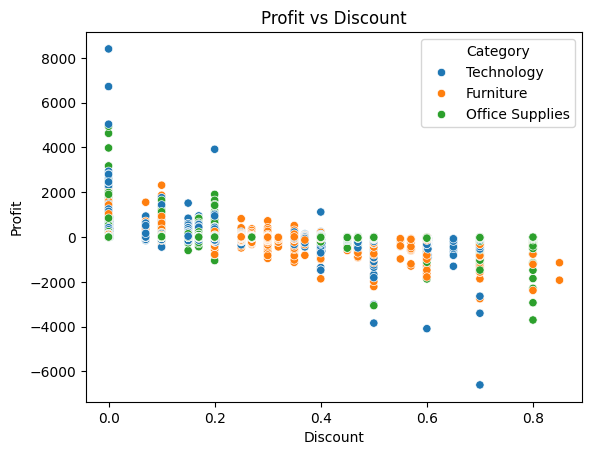

In [19]:
#  Scatter Plot: Profit vs Discount
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Profit vs Discount')
plt.show()


##Insight:

Higher discounts often lead to lower profit (as expected).

In some categories, moderate discounts still yield profit, suggesting targeted promotions work.

Clear trade-off between discounting and profitability.

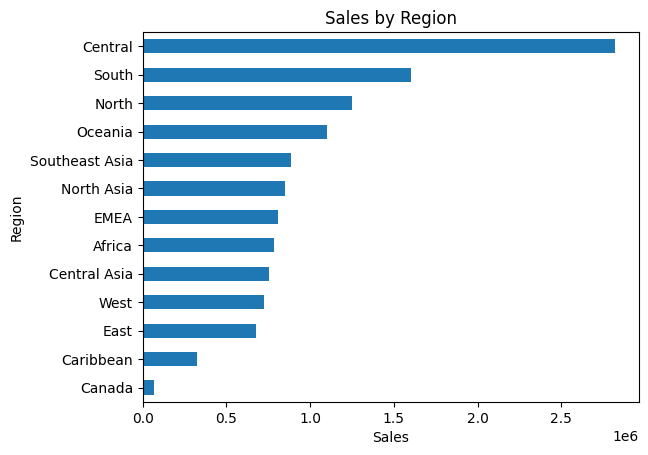

In [20]:
#  Bar Plot: Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
region_sales.plot(kind='barh', title='Sales by Region')
plt.xlabel('Sales')
plt.show()

##Insight:

Some regions clearly outperform others in total sales.

Indicates regional preferences or stronger market presence.

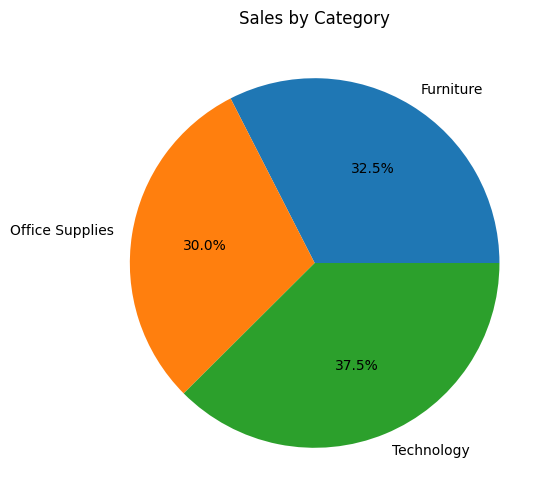

In [21]:
# Pie Chart: Sales by Category
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Category', figsize=(6,6))
plt.ylabel('')
plt.show()

##Insight:

Distribution shows which categories drive sales.

Useful for strategic inventory planning and marketing focus.

##Predictive Modeling

In [31]:
#  Linear Regression: Predicting Sales using Profit and Discount
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Feature & Target
X = df[['Profit', 'Discount', 'Quantity', 'Shipping Cost']]
y = df['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\n Linear Regression Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")


 Linear Regression Evaluation:
R² Score: 0.6811
Mean Squared Error: 71375.99


In [33]:
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Year'] = df['Order Date'].dt.year

#  Feature Set (All Useful Features)
features = [
    'Profit', 'Discount', 'Quantity', 'Shipping Cost',
    'Region', 'Category', 'Sub-Category', 'Segment',
    'Order_Month', 'Order_Year'
]
X = df[features]
y = df['Sales']

# Separate numerical and categorical columns
numerical_features = ['Profit', 'Discount', 'Quantity', 'Shipping Cost', 'Order_Month', 'Order_Year']
categorical_features = ['Region', 'Category', 'Sub-Category', 'Segment']

# ColumnTransformer to preprocess both types
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Build pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\n Linear Regression (All Variables):")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")


 Linear Regression (All Variables):
R² Score: 0.7122
Mean Squared Error: 64412.46
